In [1]:
import scipy as sc
import pylab as pl
from scipy.integrate import odeint
#from scipy import stats
#import scipy.linalg as lin
import matplotlib.pylab as gr


%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np




In [2]:
#Definición de parametros del sistema

NumNa=0.003
NumKd=0.001
NumL=0.0001
NumNaK=0.05

rNa=0.1
rKd=0.5
rL=0.01
rNak=0.3

#Definición de parametros que se refieren al flujo
VNa=55
sigNa=1
sNa=0.5

VKd=-72
sigKd=1
sKd=0.5

VL=-50
sigL=1
sL=0.5

VNak=-70
sigNak=1
sNak=0.5

VT=1
Cm= 20


In [3]:
# Definición de estados estable w_inf,  m_inf, las escales de tiempo tau_w y ta_c y la función m_L 
a=0.005
V_hw=-46
V_hm=-31

Ld=0.08
def w_inf(V):
    return 1/(1 + np.exp(-2*a*(V-V_hw)))

def m_inf(V):
    return 1/(1+ np.exp(-2*a*(V-V_hm)))

def tau_w(V):
    return 1/(Ld*np.exp(a*(V-V_hw))+Ld*np.exp(-a*(V-V_hw)))

In [4]:
# Definición de la funcion de Flujo

def Flujo(V,Vr,sig,s):
    return sig*(np.exp((s-1)*(Vr-sig*V)/VT)-np.exp(s*(Vr-sig*V)/VT))

t = np.arange(0.0, 1000.0, 0.1)


/ext/anaconda-2019.03/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


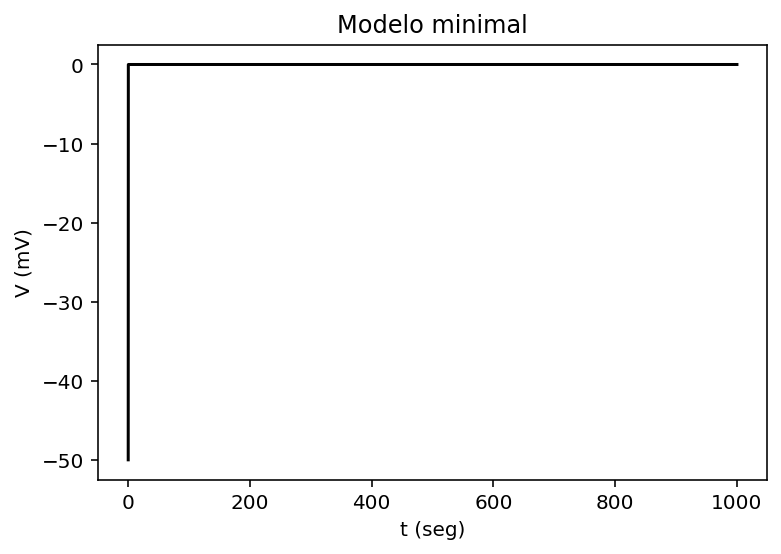

In [5]:
#Definición del sistema
def sistema(U,t):
    V,w =U
    dV=-NumNa*rNa*m_inf(V)*Flujo(V,VNa,sigNa,sNa)*(1-w)+NumKd*rKd*Flujo(V,VKd,sigKd,sKd)*w + NumL*rL*Flujo(V,VL,sigL,sL)*(1-w)*m_inf(V)
    dw=(w_inf(V)-w)/tau_w(V) 
    return dV,dw 


U = odeint(sistema,[-50,0.1],t)
V = U[:,0]
w = U[:,1]

pl.figure()
pl.title('Modelo minimal')
pl.plot(t, V, 'k')
pl.ylabel('V (mV)')
pl.xlabel('t (seg)')
pl.show()